<a href="https://colab.research.google.com/github/JemDeGuzman/Computer-Vision-Crash-Course/blob/main/Activity%205/Activity_5_Line_and_Circle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Line and Circle Detection**
**Name** | De Guzman, Jemuel Endrew C.
**Section** | CPE32S3
**Date Performed**: | 2-20-25
**Date Submitted**: | 2-21-25
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

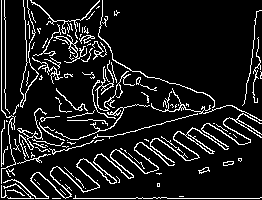

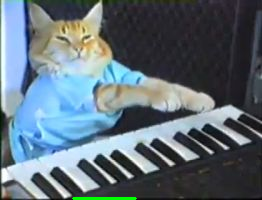

In [35]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

**The line of code that is responsible for setting the minimum line length is the one that contains the minLineLength variable.**


**The mathematical formula for the Hough transform is:**
$$Ρ = xcos(θ) + ysin(θ)$$

**The Hough converts a line in image space to a point in the Hough space by plotting the line using rho ($Ρ$) and theta ($θ$) values, which are the distance from the origin to the line and the angle between the x-axis and the line respectively.**

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

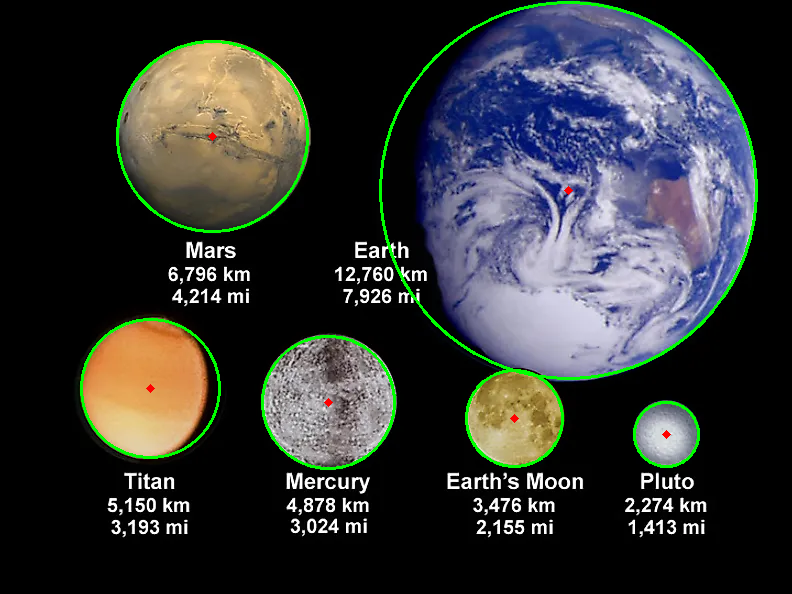

In [21]:
import cv2
import numpy as np

# Our testing value
n = 19

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite(f"planets_circles_{n}.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

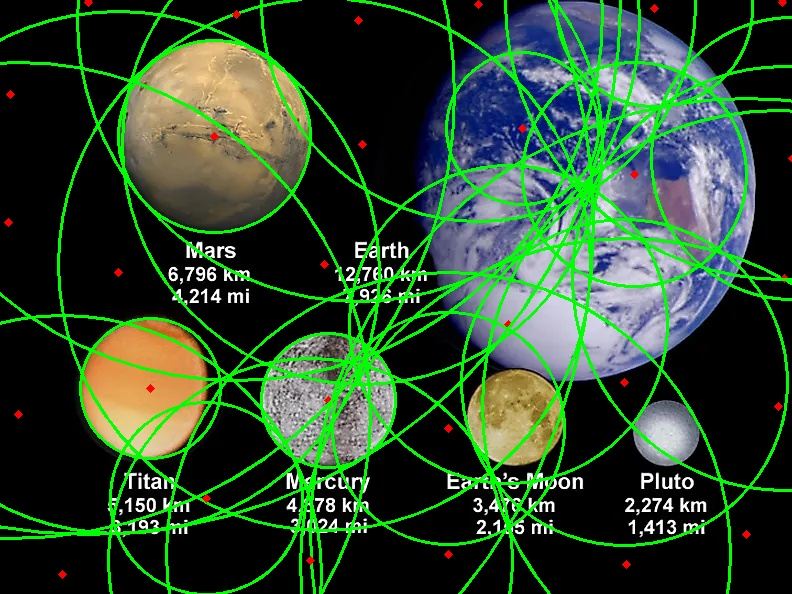

In [16]:
p_5 = cv2.imread('/content/planets_circles_5.jpg')
cv2_imshow(p_5)

Change the value to 9, **what happens to the image**?

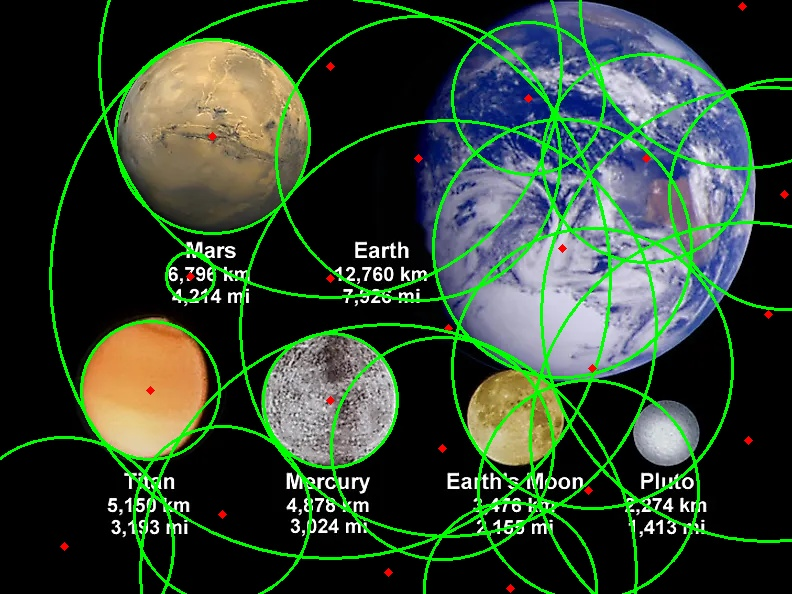

In [18]:
p_9 = cv2.imread('/content/planets_circles_9.jpg')
cv2_imshow(p_9)

Lastly, change the value to 15, **what can you say about the resulting image?**

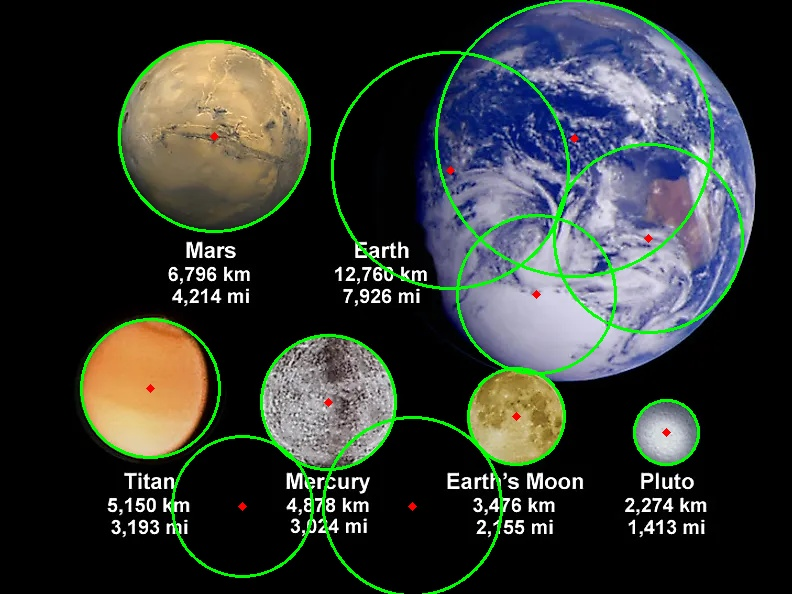

In [20]:
p_15 = cv2.imread('/content/planets_circles_15.jpg')
cv2_imshow(p_15)

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

**Based on the outputs, we can say that the higher the test value n, the lower the tolerance on much smaller circles. The higher the n value, the better the tracing. By increasing the n value, we essentially reduce the number of circles detected and thus control the output for a much better result.**

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

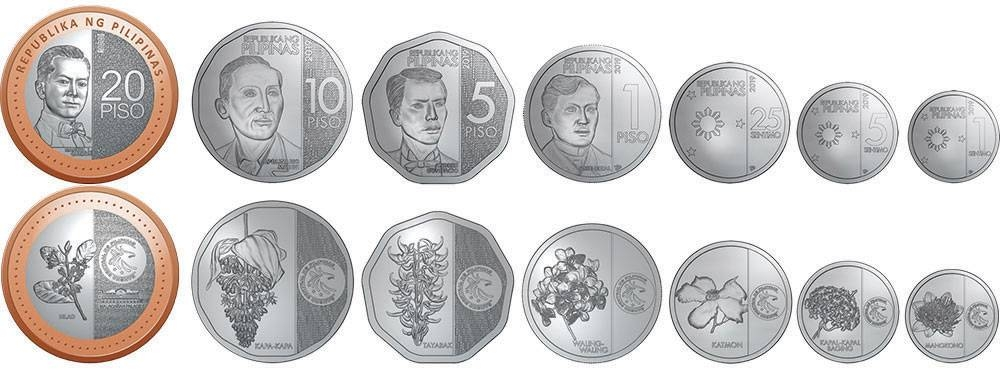

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

In [132]:
# Coin counting using Line Detection
def line_detection(im_path):
    img = cv2.imread(im_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=5)

    img_lines = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cv2_imshow(edges)
    cv2_imshow(img_lines)

    count = len(lines)
    return count

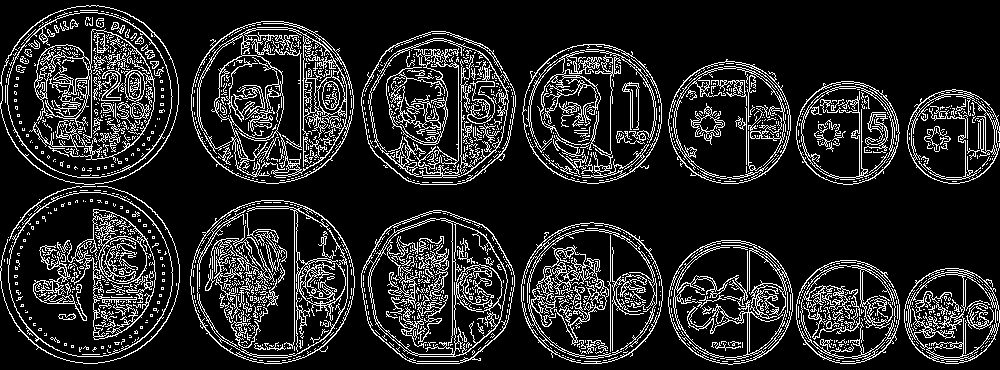

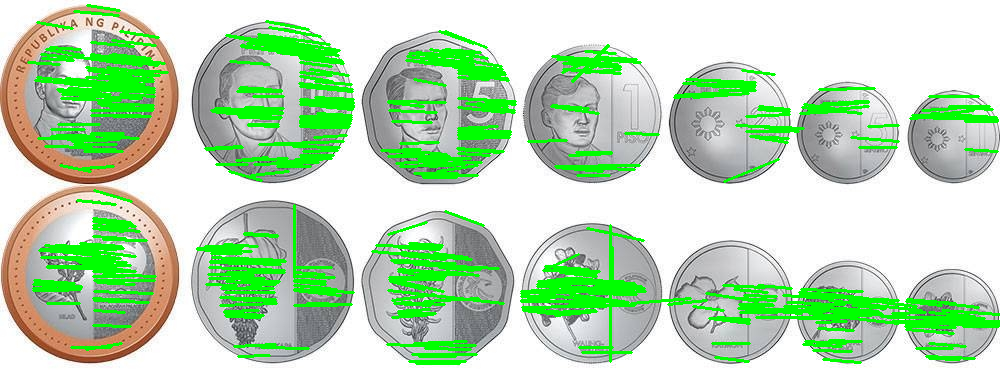

Lines Detected: 493


In [133]:
counted = line_detection('/content/coins.jpg')
print(f"Lines Detected: {counted}")

**Based on the output, it seems that it is possible for us to use the lines to count the coins. However, it would be a big challenge as we can see that there is a lot of noise. While we can only count the lines, we can somewhat count the coins using clustering but I will not be implementing it here.**

In [139]:
# Coin counting using Circle Detection
def circle_detection(im_path, n):
    img = cv2.imread(im_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.medianBlur(gray, n)

    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT, dp=1.1, minDist=40,
        param1=80, param2=30, minRadius=20, maxRadius=100
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 4)  # Draw outer circle
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)  # Draw center

    #cv2.imwrite(f"coins_{n}.jpg", img)
    cv2_imshow(img)

    count = len(circles[0])
    return count

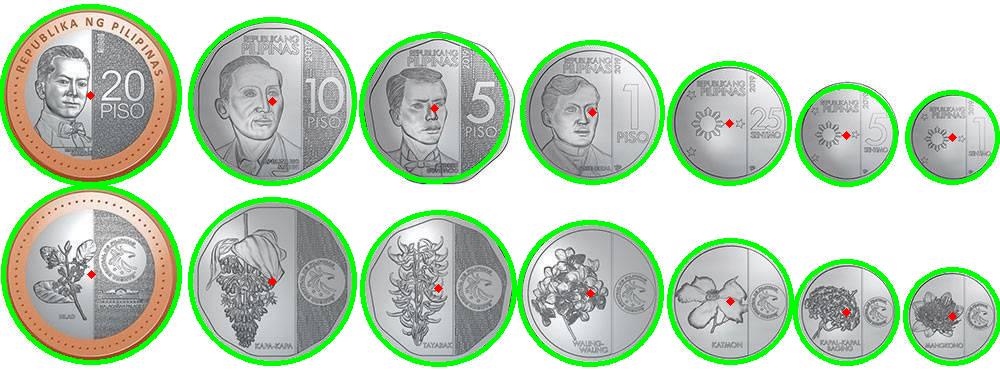

Circles Detected: 14


In [140]:
counted = circle_detection('/content/coins.jpg', 21)
print(f"Circles Detected: {counted}")

**In contrast to the difficulty of counting the coins using the lines, we can see that by circle detection, we have counted the exact number of coins. The coins have been properly traced using the circles and the detection function works properly. Some manual adjustments are required, especially with the n value but other than that, the program works perfectly.**

## 5. Summary, Conclusions and Lessons Learned

**Based on the activity, I learned about the utilization of the Hough transform in order to detect lines and circles found on images using OpenCV. By adjusting proper parameters, we are able to detect and trace lines and circles found on images. While the line detection is much harder to perform and much more varying, it is still possible to trace out objects using the lines. On the other hand, circle detection is much smoother and only needs a small amount of adjustments in order to perform well. These 2 are crucial as they are much specific than just detecting edges and contours. These methods are important ffor learning how to do object and face detection, which are much specific and only have such shapes as their attributes.**

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*